In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
reviews = pd.read_csv('imdb_labelled.txt', delimiter="\t", header=None)


In [5]:
reviews.columns = ['review', 'neg']

In [6]:
reviews.head()

,review,neg
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
keywords = ['bad', 'terrible', 'horrible', 'crap', 'overrated', 'never', 'hate', 'boring', 'sleepy', 'not', 'sucks']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [20]:

reviews['long'] = reviews.review.str.len() > 20

In [9]:
reviews.head()

,review,neg,bad,terrible,horrible,crap,overrated,never,hate,boring,sleepy,not,sucks,long
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False,True
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,True
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,True
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,True
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False,False,False,False,True


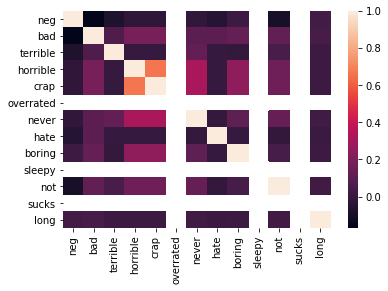

In [10]:
sns.heatmap(reviews.corr())

In [12]:

data = reviews[keywords + ['long']]
target = reviews['neg']

In [13]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 312


## Another Dataset (Yelp)

In [14]:
reviews = pd.read_csv('yelp_labelled.txt', delimiter="\t", header=None)
reviews.columns = ['review', 'neg']

In [15]:
keywords = ['bad', 'terrible', 'horrible', 'crap', 'overrated', 'never', 'hate', 'boring', 'sleepy', 'not', 'sucks']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [17]:
reviews['long'] = reviews.review.str.len() > 20
reviews.neg = reviews.neg.astype(bool)

In [18]:
data = reviews[keywords + ['long']]
target = reviews['neg']

In [19]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 403


# Conclusion

## The accuracy of this model is pretty similar to each other for comparing datasets of movie reviews to restaurant reviews.